# Importing Library and dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
loan_data_inputs_train = pd.read_csv('drive/MyDrive/Rakamin VIX Data Scientist/loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('drive/MyDrive/Rakamin VIX Data Scientist/loan_data_targets_train.csv', index_col = 0, header = 0)
loan_data_inputs_test = pd.read_csv('drive/MyDrive/Rakamin VIX Data Scientist/loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('drive/MyDrive/Rakamin VIX Data Scientist/loan_data_targets_test.csv', index_col = 0, header = 0)

# Exploring Dataset

In [4]:
loan_data_inputs_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,12796369,14818505,24000,24000,24000.0,36,8.90,762.08,A,A5,...,1,0,0,1,0,0,0,0,0,0
206088,1439740,1691948,10000,10000,10000.0,36,14.33,343.39,C,C1,...,0,0,0,1,0,0,0,0,0,0
136020,5214749,6556909,20425,20425,20425.0,36,8.90,648.56,A,A5,...,0,0,0,1,0,0,0,0,0,0
412305,13827698,15890016,17200,17200,17200.0,36,16.59,609.73,D,D1,...,0,0,0,1,0,0,0,0,0,0
36159,422455,496525,8400,8400,7450.0,36,12.84,282.40,C,C2,...,0,1,0,1,0,0,0,0,0,0


In [5]:
loan_data_targets_train.head()

,debtor_type
427211,1
206088,1
136020,1
412305,0
36159,0


In [6]:
loan_data_inputs_test.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,19677589,21900299,32500,32500,32500.0,60,14.99,773.01,C,C5,...,0,0,0,1,0,0,0,0,0,0
288564,29755527,32278795,11000,11000,11000.0,60,20.99,297.53,E,E4,...,0,1,0,1,0,0,0,0,0,0
213591,1343334,1588314,30000,30000,30000.0,36,14.65,1034.83,C,C2,...,0,0,0,1,0,0,0,0,0,0
263083,33131681,35775007,14400,14400,14400.0,60,14.49,338.74,C,C4,...,0,0,0,1,0,0,0,0,0,0
165001,3293168,4066358,15000,15000,14900.0,36,8.90,476.30,A,A5,...,0,0,0,1,0,0,0,0,0,0


In [7]:
loan_data_targets_test.head()

,debtor_type
362514,1
288564,1
213591,1
263083,1
165001,1


# Feature Selection

In [8]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'months_since_issue_d:<38',
'months_since_issue_d:38-39',
'months_since_issue_d:40-41',
'months_since_issue_d:42-48',
'months_since_issue_d:49-52',
'months_since_issue_d:53-64',
'months_since_issue_d:65-84',
'months_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'months_since_earliest_cr_line:141-164',
'months_since_earliest_cr_line:165-247',
'months_since_earliest_cr_line:248-270',
'months_since_earliest_cr_line:271-352',
'months_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [9]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'months_since_issue_d:>84',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [10]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [12]:
reg = LogisticRegression()

In [13]:
pd.options.display.max_rows = None

In [14]:
reg.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [15]:
reg.intercept_

array([-1.0088472])

In [16]:
reg.coef_

array([[ 0.47053417,  0.54906199,  0.50016718,  0.42475762,  0.29535591,
         0.11087502,  0.1193839 ,  0.11574742,  0.02348932,  0.04577532,
         0.06810547,  0.04593718,  0.07194918,  0.14026518,  0.10228751,
         0.1769106 ,  0.24277967,  0.22914379,  0.25695892,  0.33036567,
         0.50829056,  0.13440249,  0.09823545,  0.39323969,  0.29435361,
         0.28986703,  0.33447223,  0.26691439,  0.09097409,  0.06406118,
         0.08386373,  0.02881688,  0.04177987,  0.11157797,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.43589405,  0.81717604,  0.47869276,  0.14552977,
        -0.02871534, -0.1367035 , -0.20109301, -0.179314  , -0.14687542,
        -0.03557788, -0.05672287,  0.90606772,  0.73439602,  0.49533836,
        -0.01769649, -0.0769816 , -0.11760457, -0.12976174, -0.12006785,
        -0.03908294, -0.11053657,  0.1427908 ,  0.22562432, -0.02488018,
         0.01698798,  0.25063289,  0.10550999,  0.1

In [17]:
feature_name = inputs_train.columns.values

In [18]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)

# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1 # Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]] # Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index() # Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,-1.008847
1,grade:A,0.470534
2,grade:B,0.549062
3,grade:C,0.500167
4,grade:D,0.424758
5,grade:E,0.295356
6,grade:F,0.110875
7,home_ownership:OWN,0.119384
8,home_ownership:MORTGAGE,0.115747
9,addr_state:NM_VA,0.023489


In [19]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(max_iter=1000,*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        from sklearn.feature_selection import chi2
        scores, pvalues = chi2(inputs_train, loan_data_targets_train)
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = pvalues

In [20]:
reg = LogisticRegression_with_p_values()

In [21]:
reg.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.431771
1,grade:A,0.464927
2,grade:B,0.545431
3,grade:C,0.496964
4,grade:D,0.423072
5,grade:E,0.296097
6,grade:F,0.113717
7,home_ownership:OWN,0.119867
8,home_ownership:MORTGAGE,0.115935
9,addr_state:NM_VA,0.025869


In [23]:
p_values = reg.p_values

In [24]:
p_values = np.append(np.nan, np.array(p_values))

In [25]:
summary_table['p_values'] = p_values

In [26]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.431771,NaN
1,grade:A,0.464927,0.000000e+00
2,grade:B,0.545431,1.784444e-227
3,grade:C,0.496964,6.162241e-07
4,grade:D,0.423072,1.660384e-272
5,grade:E,0.296097,0.000000e+00
6,grade:F,0.113717,0.000000e+00
7,home_ownership:OWN,0.119867,2.786529e-01
8,home_ownership:MORTGAGE,0.115935,5.696552e-75
9,addr_state:NM_VA,0.025869,1.040852e-02


In [27]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'months_since_issue_d:<38',
'months_since_issue_d:38-39',
'months_since_issue_d:40-41',
'months_since_issue_d:42-48',
'months_since_issue_d:49-52',
'months_since_issue_d:53-64',
'months_since_issue_d:65-84',
'months_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'months_since_earliest_cr_line:141-164',
'months_since_earliest_cr_line:165-247',
'months_since_earliest_cr_line:248-270',
'months_since_earliest_cr_line:271-352',
'months_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'months_since_issue_d:>84',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [28]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [29]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
reg_deployment = linear_model.LogisticRegression(max_iter=1000)
reg_deployment.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [31]:
feature_name = inputs_train.columns.values

In [32]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.202579
1,grade:A,0.485849
2,grade:B,0.577129
3,grade:C,0.521511
4,grade:D,0.439204
5,grade:E,0.303506
6,grade:F,0.115989
7,home_ownership:OWN,0.137269
8,home_ownership:MORTGAGE,0.127493
9,addr_state:NM_VA,0.025793


In [33]:
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.202579,NaN
1,grade:A,0.485849,0.000000e+00
2,grade:B,0.577129,1.784444e-227
3,grade:C,0.521511,6.162241e-07
4,grade:D,0.439204,1.660384e-272
5,grade:E,0.303506,0.000000e+00
6,grade:F,0.115989,0.000000e+00
7,home_ownership:OWN,0.137269,2.786529e-01
8,home_ownership:MORTGAGE,0.127493,5.696552e-75
9,addr_state:NM_VA,0.025793,1.040852e-02


In [34]:
import pickle

In [37]:
pickle.dump(reg2, open('drive/MyDrive/Rakamin VIX Data Scientist//pd_model.sav', 'wb'))
pickle.dump(reg_deployment, open('drive/MyDrive/Rakamin VIX Data Scientist/pd_model_deployment.sav', 'wb'))

# Model Validation

In [38]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'months_since_issue_d:<38',
'months_since_issue_d:38-39',
'months_since_issue_d:40-41',
'months_since_issue_d:42-48',
'months_since_issue_d:49-52',
'months_since_issue_d:53-64',
'months_since_issue_d:65-84',
'months_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'months_since_earliest_cr_line:141-164',
'months_since_earliest_cr_line:165-247',
'months_since_earliest_cr_line:248-270',
'months_since_earliest_cr_line:271-352',
'months_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [39]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'months_since_issue_d:>84',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [40]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [41]:
y_hat_test = reg2.model.predict(inputs_test)

In [42]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [43]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [44]:
y_hat_test_proba

array([[0.11491432, 0.88508568],
       [0.16963095, 0.83036905],
       [0.0716408 , 0.9283592 ],
       ...,
       [0.02839129, 0.97160871],
       [0.04792386, 0.95207614],
       [0.0433701 , 0.9566299 ]])

In [45]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [46]:
loan_data_targets_test_temp = loan_data_targets_test

In [47]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [48]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [49]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [50]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [51]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.885086
288564,1,0.830369
213591,1,0.928359
263083,1,0.918042
165001,1,0.972313


# Accuracy and Area Under Curve (AUC)

In [52]:
tr = 0.9
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [53]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,7395,2795
1,37536,45531


In [54]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.079297,0.029971
1,0.402501,0.488231


In [55]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
362514,1,0.885086,0
288564,1,0.830369,0
213591,1,0.928359,1
263083,1,0.918042,1
165001,1,0.972313,1


In [56]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5675284429050902

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

In [58]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 4.09308149e-04, ...,
        9.99963885e-01, 9.99963885e-01, 1.00000000e+00]),
 array([1.9905347 , 0.9905347 , 0.98632184, ..., 0.47827182, 0.41705044,
        0.33507258]))

In [59]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

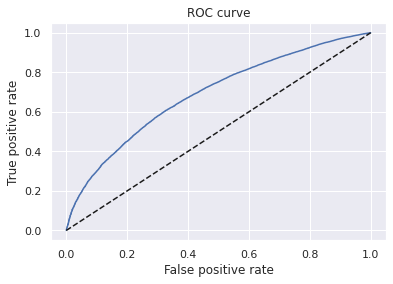

In [61]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [62]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.6887600852796588

In [63]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [64]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42344,1,0.335073,0
42341,1,0.336145,0
42404,1,0.416916,0
39810,0,0.417050,0
42396,0,0.424915,0


In [65]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
239228,1,0.989055,1
314806,1,0.989374,1
309492,1,0.989401,1
284281,1,0.989772,1
242624,1,0.990535,1


In [66]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [67]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
42344,1,0.335073,0,42345,1,42344
42341,1,0.336145,0,42342,2,42340
42404,1,0.416916,0,42405,3,42402
39810,0,0.417050,0,39811,3,39808
42396,0,0.424915,0,42397,3,42394


In [68]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [69]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
42344,1,0.335073,0,42345,1,42344,0.454068,0.000012,4.155447
42341,1,0.336145,0,42342,2,42340,0.454036,0.000024,4.155054
42404,1,0.416916,0,42405,3,42402,0.454711,0.000036,4.161138
39810,0,0.417050,0,39811,3,39808,0.426896,0.000036,3.906575
42396,0,0.424915,0,42397,3,42394,0.454625,0.000036,4.160353


In [70]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
239228,1,0.989055,1,239229,83063,156166,2.565266,0.999952,15.325417
314806,1,0.989374,1,314807,83064,231743,3.375693,0.999964,22.742198
309492,1,0.989401,1,309493,83065,226428,3.318711,0.999976,22.220608
284281,1,0.989772,1,284282,83066,201216,3.048372,0.999988,19.746418
242624,1,0.990535,1,242625,83067,159558,2.601681,1.000000,15.658292


Text(0.5, 1.0, 'Gini')

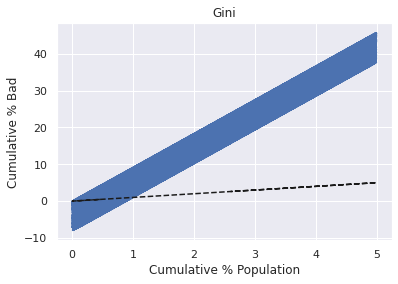

In [72]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [74]:
Gini = AUROC * 2 - 1
Gini

0.37752017055931764

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

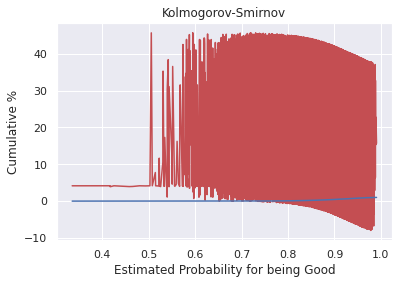

In [75]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')

In [76]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

45.677233335876885

### Calculating PD of individual accounts

In [77]:
pd.options.display.max_columns = None
# Sets the pandas dataframe options to display all columns/ rows.

In [78]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,months_since_issue_d:<38,months_since_issue_d:38-39,months_since_issue_d:40-41,months_since_issue_d:42-48,months_since_issue_d:49-52,months_since_issue_d:53-64,months_since_issue_d:65-84,months_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,months_since_earliest_cr_line:<140,months_since_earliest_cr_line:141-164,months_since_earliest_cr_line:165-247,months_since_earliest_cr_line:248-270,months_since_earliest_cr_line:271-352,months_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [79]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.202579,NaN
1,grade:A,0.485849,0.000000e+00
2,grade:B,0.577129,1.784444e-227
3,grade:C,0.521511,6.162241e-07
4,grade:D,0.439204,1.660384e-272
5,grade:E,0.303506,0.000000e+00
6,grade:F,0.115989,0.000000e+00
7,home_ownership:OWN,0.137269,2.786529e-01
8,home_ownership:MORTGAGE,0.127493,5.696552e-75
9,addr_state:NM_VA,0.025793,1.040852e-02


In [80]:
y_hat_test_proba

array([0.88508568, 0.83036905, 0.9283592 , ..., 0.97160871, 0.95207614,
       0.9566299 ])

### Creating a Scorecard

In [81]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.202579,NaN
1,grade:A,0.485849,0.000000e+00
2,grade:B,0.577129,1.784444e-227
3,grade:C,0.521511,6.162241e-07
4,grade:D,0.439204,1.660384e-272
5,grade:E,0.303506,0.000000e+00
6,grade:F,0.115989,0.000000e+00
7,home_ownership:OWN,0.137269,2.786529e-01
8,home_ownership:MORTGAGE,0.127493,5.696552e-75
9,addr_state:NM_VA,0.025793,1.040852e-02


In [82]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'months_since_issue_d:>84',
 'int_rate:>20.281',
 'months_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [84]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['p_values'] = np.nan
# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,months_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [85]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
# Concatenates two dataframes.
df_scorecard = df_scorecard.reset_index()
# We reset the index of a dataframe.
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.202579,NaN
1,1,grade:A,0.485849,0.000000e+00
2,2,grade:B,0.577129,1.784444e-227
3,3,grade:C,0.521511,6.162241e-07
4,4,grade:D,0.439204,1.660384e-272
5,5,grade:E,0.303506,0.000000e+00
6,6,grade:F,0.115989,0.000000e+00
7,7,home_ownership:OWN,0.137269,2.786529e-01
8,8,home_ownership:MORTGAGE,0.127493,5.696552e-75
9,9,addr_state:NM_VA,0.025793,1.040852e-02


In [86]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.202579,NaN,Intercept
1,1,grade:A,0.485849,0.000000e+00,grade
2,2,grade:B,0.577129,1.784444e-227,grade
3,3,grade:C,0.521511,6.162241e-07,grade
4,4,grade:D,0.439204,1.660384e-272,grade
5,5,grade:E,0.303506,0.000000e+00,grade
6,6,grade:F,0.115989,0.000000e+00,grade
7,7,home_ownership:OWN,0.137269,2.786529e-01,home_ownership
8,8,home_ownership:MORTGAGE,0.127493,5.696552e-75,home_ownership
9,9,addr_state:NM_VA,0.025793,1.040852e-02,addr_state


In [87]:
min_score = 300
max_score = 850

In [88]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.

Original feature name
Intercept                       -1.202579
acc_now_delinq                   0.000000
addr_state                       0.000000
annual_inc                      -0.063891
dti                             -0.297594
emp_length                       0.000000
grade                            0.000000
home_ownership                   0.000000
initial_list_status              0.000000
inq_last_6mths                   0.000000
int_rate                         0.000000
months_since_earliest_cr_line   -0.183207
months_since_issue_d             0.000000
mths_since_last_delinq           0.000000
mths_since_last_record           0.000000
purpose                          0.000000
term                             0.000000
verification_status              0.000000
Name: Coefficients, dtype: float64

In [89]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef

-1.7472706593989047

In [90]:

df_scorecard.groupby('Original feature name')['Coefficients'].max()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.

Original feature name
Intercept                       -1.202579
acc_now_delinq                   0.286229
addr_state                       0.516161
annual_inc                       0.627639
dti                              0.000000
emp_length                       0.120048
grade                            0.577129
home_ownership                   0.137269
initial_list_status              0.285048
inq_last_6mths                   0.983684
int_rate                         1.457625
months_since_earliest_cr_line    0.000000
months_since_issue_d             0.000000
mths_since_last_delinq           0.176372
mths_since_last_record           1.060507
purpose                          0.417560
term                             0.075214
verification_status              0.114912
Name: Coefficients, dtype: float64

In [91]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef

5.632818359549459

![image.png](attachment:image.png)

In [92]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.202579,NaN,Intercept,-89.622010
1,1,grade:A,0.485849,0.000000e+00,grade,36.207851
2,2,grade:B,0.577129,1.784444e-227,grade,43.010413
3,3,grade:C,0.521511,6.162241e-07,grade,38.865549
4,4,grade:D,0.439204,1.660384e-272,grade,32.731622
5,5,grade:E,0.303506,0.000000e+00,grade,22.618775
6,6,grade:F,0.115989,0.000000e+00,grade,8.644051
7,7,home_ownership:OWN,0.137269,2.786529e-01,home_ownership,10.229917
8,8,home_ownership:MORTGAGE,0.127493,5.696552e-75,home_ownership,9.501392
9,9,addr_state:NM_VA,0.025793,1.040852e-02,addr_state,1.922255


![image.png](attachment:image.png)

In [93]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score. 
df_scorecard

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.202579,NaN,Intercept,340.593067
1,1,grade:A,0.485849,0.000000e+00,grade,36.207851
2,2,grade:B,0.577129,1.784444e-227,grade,43.010413
3,3,grade:C,0.521511,6.162241e-07,grade,38.865549
4,4,grade:D,0.439204,1.660384e-272,grade,32.731622
5,5,grade:E,0.303506,0.000000e+00,grade,22.618775
6,6,grade:F,0.115989,0.000000e+00,grade,8.644051
7,7,home_ownership:OWN,0.137269,2.786529e-01,home_ownership,10.229917
8,8,home_ownership:MORTGAGE,0.127493,5.696552e-75,home_ownership,9.501392
9,9,addr_state:NM_VA,0.025793,1.040852e-02,addr_state,1.922255


In [94]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.202579,NaN,Intercept,340.593067,341.0
1,1,grade:A,0.485849,0.000000e+00,grade,36.207851,36.0
2,2,grade:B,0.577129,1.784444e-227,grade,43.010413,43.0
3,3,grade:C,0.521511,6.162241e-07,grade,38.865549,39.0
4,4,grade:D,0.439204,1.660384e-272,grade,32.731622,33.0
5,5,grade:E,0.303506,0.000000e+00,grade,22.618775,23.0
6,6,grade:F,0.115989,0.000000e+00,grade,8.644051,9.0
7,7,home_ownership:OWN,0.137269,2.786529e-01,home_ownership,10.229917,10.0
8,8,home_ownership:MORTGAGE,0.127493,5.696552e-75,home_ownership,9.501392,10.0
9,9,addr_state:NM_VA,0.025793,1.040852e-02,addr_state,1.922255,2.0


In [95]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [96]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

850.0

In [97]:
# One has to be subtracted from the maximum score for one original variable. Which one? We'll evaluate based on differences.

In [98]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-1.202579,NaN,Intercept,340.593067,341.0,0.406933
1,1,grade:A,0.485849,0.000000e+00,grade,36.207851,36.0,-0.207851
2,2,grade:B,0.577129,1.784444e-227,grade,43.010413,43.0,-0.010413
3,3,grade:C,0.521511,6.162241e-07,grade,38.865549,39.0,0.134451
4,4,grade:D,0.439204,1.660384e-272,grade,32.731622,33.0,0.268378
5,5,grade:E,0.303506,0.000000e+00,grade,22.618775,23.0,0.381225
6,6,grade:F,0.115989,0.000000e+00,grade,8.644051,9.0,0.355949
7,7,home_ownership:OWN,0.137269,2.786529e-01,home_ownership,10.229917,10.0,-0.229917
8,8,home_ownership:MORTGAGE,0.127493,5.696552e-75,home_ownership,9.501392,10.0,0.498608
9,9,addr_state:NM_VA,0.025793,1.040852e-02,addr_state,1.922255,2.0,0.077745


In [99]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][45] = -2
#df_scorecard['Score - Final'][17] = 19
df_scorecard

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.202579,NaN,Intercept,340.593067,341.0,0.406933,341.0
1,1,grade:A,0.485849,0.000000e+00,grade,36.207851,36.0,-0.207851,36.0
2,2,grade:B,0.577129,1.784444e-227,grade,43.010413,43.0,-0.010413,43.0
3,3,grade:C,0.521511,6.162241e-07,grade,38.865549,39.0,0.134451,39.0
4,4,grade:D,0.439204,1.660384e-272,grade,32.731622,33.0,0.268378,33.0
5,5,grade:E,0.303506,0.000000e+00,grade,22.618775,23.0,0.381225,23.0
6,6,grade:F,0.115989,0.000000e+00,grade,8.644051,9.0,0.355949,9.0
7,7,home_ownership:OWN,0.137269,2.786529e-01,home_ownership,10.229917,10.0,-0.229917,10.0
8,8,home_ownership:MORTGAGE,0.127493,5.696552e-75,home_ownership,9.501392,10.0,0.498608,10.0
9,9,addr_state:NM_VA,0.025793,1.040852e-02,addr_state,1.922255,2.0,0.077745,2.0


In [100]:
df_scorecard.groupby('Original feature name')['Score - Final'].min()

Original feature name
Intercept                        341.0
acc_now_delinq                     0.0
addr_state                         0.0
annual_inc                        -5.0
dti                              -22.0
emp_length                         0.0
grade                              0.0
home_ownership                     0.0
initial_list_status                0.0
inq_last_6mths                     0.0
int_rate                          -2.0
months_since_earliest_cr_line    -14.0
months_since_issue_d               0.0
mths_since_last_delinq             0.0
mths_since_last_record             0.0
purpose                            0.0
term                               0.0
verification_status                0.0
Name: Score - Final, dtype: float64

In [101]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

298.0

In [102]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

850.0

### Caclulating Credit Score

In [103]:
print(inputs_test_with_ref_cat.shape)
inputs_test_with_ref_cat.head()

(93257, 101)


,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,months_since_issue_d:<38,months_since_issue_d:38-39,months_since_issue_d:40-41,months_since_issue_d:42-48,months_since_issue_d:49-52,months_since_issue_d:53-64,months_since_issue_d:65-84,months_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,months_since_earliest_cr_line:<140,months_since_earliest_cr_line:141-164,months_since_earliest_cr_line:165-247,months_since_earliest_cr_line:248-270,months_since_earliest_cr_line:271-352,months_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [104]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [105]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.

In [106]:
print(inputs_test_with_ref_cat_w_intercept.shape)
inputs_test_with_ref_cat_w_intercept.head()

(93257, 102)


,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,months_since_issue_d:<38,months_since_issue_d:38-39,months_since_issue_d:40-41,months_since_issue_d:42-48,months_since_issue_d:49-52,months_since_issue_d:53-64,months_since_issue_d:65-84,months_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,months_since_earliest_cr_line:<140,months_since_earliest_cr_line:141-164,months_since_earliest_cr_line:165-247,months_since_earliest_cr_line:248-270,months_since_earliest_cr_line:271-352,months_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [107]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.
print(inputs_test_with_ref_cat_w_intercept.shape)

(93257, 102)


In [108]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,months_since_issue_d:<38,months_since_issue_d:38-39,months_since_issue_d:40-41,months_since_issue_d:42-48,months_since_issue_d:49-52,months_since_issue_d:53-64,months_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,months_since_earliest_cr_line:141-164,months_since_earliest_cr_line:165-247,months_since_earliest_cr_line:248-270,months_since_earliest_cr_line:271-352,months_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,months_since_issue_d:>84,int_rate:>20.281,months_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0


In [109]:
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.202579,NaN,Intercept,340.593067,341.0,0.406933,341.0
1,1,grade:A,0.485849,0.000000e+00,grade,36.207851,36.0,-0.207851,36.0
2,2,grade:B,0.577129,1.784444e-227,grade,43.010413,43.0,-0.010413,43.0
3,3,grade:C,0.521511,6.162241e-07,grade,38.865549,39.0,0.134451,39.0
4,4,grade:D,0.439204,1.660384e-272,grade,32.731622,33.0,0.268378,33.0


In [110]:
scorecard_scores = df_scorecard['Score - Final']
print(scorecard_scores.shape)
scorecard_scores.head()

(102,)


0    341.0
1     36.0
2     43.0
3     39.0
4     33.0
Name: Score - Final, dtype: float64

In [111]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [112]:
scorecard_scores.shape

(102,)

In [113]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [114]:
scorecard_scores.shape

(102, 1)

In [115]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,months_since_issue_d:<38,months_since_issue_d:38-39,months_since_issue_d:40-41,months_since_issue_d:42-48,months_since_issue_d:49-52,months_since_issue_d:53-64,months_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,months_since_earliest_cr_line:141-164,months_since_earliest_cr_line:165-247,months_since_earliest_cr_line:248-270,months_since_earliest_cr_line:271-352,months_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,months_since_issue_d:>84,int_rate:>20.281,months_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0


In [116]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.

In [117]:
y_scores.head()

,0
362514,582.0
288564,548.0
213591,621.0
263083,610.0
165001,696.0


In [118]:
y_scores.tail()

,0
115,604.0
296284,653.0
61777,693.0
91763,653.0
167512,661.0


##### Score Card

In [119]:
df_scorecard.groupby(['Original feature name','Feature name'])['Score - Final'].mean()

Original feature name          Feature name                                
Intercept                      Intercept                                       341.0
acc_now_delinq                 acc_now_delinq:0                                  0.0
                               acc_now_delinq:>=1                               21.0
addr_state                     addr_state:AR_MI_PA_OH_MN                        11.0
                               addr_state:CA                                     4.0
                               addr_state:GA_WA_OR                              14.0
                               addr_state:IL_CT                                 20.0
                               addr_state:KS_SC_CO_VT_AK_MS                     25.0
                               addr_state:ND_NE_IA_NV_FL_HI_AL                   0.0
                               addr_state:NM_VA                                  2.0
                               addr_state:NY                              

### From Credit Score to PD

![image.png](attachment:image.png)

In [120]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.

In [121]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
# Here we divide an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score.head()

,0
362514,0.884597
288564,0.829272
213591,0.928244
263083,0.917769
165001,0.972519


In [122]:
y_hat_test_proba[0: 5]

array([0.88508568, 0.83036905, 0.9283592 , 0.91804197, 0.97231333])

In [123]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
42344,1,0.335073,0,42345,1,42344,0.454068,0.000012,4.155447
42341,1,0.336145,0,42342,2,42340,0.454036,0.000024,4.155054
42404,1,0.416916,0,42405,3,42402,0.454711,0.000036,4.161138
39810,0,0.417050,0,39811,3,39808,0.426896,0.000036,3.906575
42396,0,0.424915,0,42397,3,42394,0.454625,0.000036,4.160353


### Setting Cut-offs
![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

In [124]:
# We need the confusion matrix again.
#np.where(np.squeeze(np.array(loan_data_targets_test)) == np.where(y_hat_test_proba >= tr, 1, 0), 1, 0).sum() / loan_data_targets_test.shape[0]
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
#df_actual_predicted_probs['loan_data_targets_test'] == np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1, 0)

In [125]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7395,2795
1,37536,45531


In [126]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079297,0.029971
1,0.402501,0.488231


In [127]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5675284429050902

In [128]:
from sklearn.metrics import roc_curve, roc_auc_score

In [129]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 4.09308149e-04, ...,
        9.99963885e-01, 9.99963885e-01, 1.00000000e+00]),
 array([1.9905347 , 0.9905347 , 0.98632184, ..., 0.47827182, 0.41705044,
        0.33507258]))

In [130]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [131]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
42344,1,0.335073,0,42345,1,42344,0.454068,0.000012,4.155447
42341,1,0.336145,0,42342,2,42340,0.454036,0.000024,4.155054
42404,1,0.416916,0,42405,3,42402,0.454711,0.000036,4.161138
39810,0,0.417050,0,39811,3,39808,0.426896,0.000036,3.906575
42396,0,0.424915,0,42397,3,42394,0.454625,0.000036,4.160353


Text(0.5, 1.0, 'ROC curve')

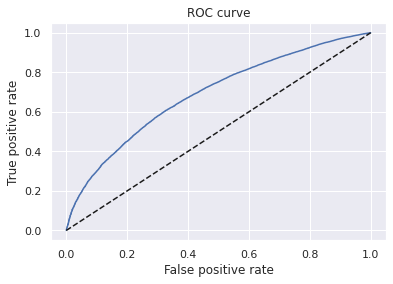

In [132]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [133]:
thresholds

array([1.9905347 , 0.9905347 , 0.98632184, ..., 0.47827182, 0.41705044,
       0.33507258])

In [134]:
thresholds.shape

(18020,)

In [135]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
# We concatenate 3 dataframes along the columns.

In [136]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
# We name the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.

In [137]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.990535,0.000000,0.000000
1,0.990535,0.000000,0.000012
2,0.986322,0.000000,0.000409
3,0.986175,0.000098,0.000409
4,0.983772,0.000098,0.001818


In [138]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

In [139]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.000000,0.000000,0.000000
1,0.990535,0.000000,0.000012
2,0.986322,0.000000,0.000409
3,0.986175,0.000098,0.000409
4,0.983772,0.000098,0.001818


![image.png](attachment:image.png)

In [140]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [141]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,3168.0
1,0.990535,0.000000,0.000012,777.0
2,0.986322,0.000000,0.000409,749.0
3,0.986175,0.000098,0.000409,748.0
4,0.983772,0.000098,0.001818,736.0


In [142]:
df_cutoffs['Score'][0] = max_score

In [143]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.990535,0.000000,0.000012,777.0
2,0.986322,0.000000,0.000409,749.0
3,0.986175,0.000098,0.000409,748.0
4,0.983772,0.000098,0.001818,736.0


In [144]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
18015,0.505502,0.999509,0.999928,432.0
18016,0.502514,0.999607,0.999928,431.0
18017,0.478272,0.999607,0.999964,424.0
18018,0.417050,1.000000,0.999964,405.0
18019,0.335073,1.000000,1.000000,379.0


In [145]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

![image.png](attachment:image.png)

In [146]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [147]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.990535,0.000000,0.000012,777.0,1,93256,0.000011,0.999989
2,0.986322,0.000000,0.000409,749.0,34,93223,0.000365,0.999635
3,0.986175,0.000098,0.000409,748.0,35,93222,0.000375,0.999625
4,0.983772,0.000098,0.001818,736.0,152,93105,0.001630,0.998370


In [148]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
18015,0.505502,0.999509,0.999928,432.0,93246,11,0.999882,0.000118
18016,0.502514,0.999607,0.999928,431.0,93247,10,0.999893,0.000107
18017,0.478272,0.999607,0.999964,424.0,93250,7,0.999925,0.000075
18018,0.417050,1.000000,0.999964,405.0,93254,3,0.999968,0.000032
18019,0.335073,1.000000,1.000000,379.0,93257,0,1.000000,0.000000


In [149]:
df_cutoffs.iloc[5000: 6200, ]
# Here we display the dataframe with cutoffs form line with index 5000 to line with index 6200.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.906631,0.240137,0.504906,600.0,44388,48869,0.475975,0.524025
5001,0.906628,0.240236,0.504906,600.0,44389,48868,0.475986,0.524014
5002,0.906588,0.240236,0.505122,600.0,44407,48850,0.476179,0.523821
5003,0.906585,0.240334,0.505122,600.0,44408,48849,0.476189,0.523811
5004,0.906584,0.240334,0.505134,600.0,44409,48848,0.476200,0.523800
5005,0.906583,0.240432,0.505134,600.0,44410,48847,0.476211,0.523789
5006,0.906530,0.240432,0.505459,600.0,44437,48820,0.476500,0.523500
5007,0.906527,0.240530,0.505459,600.0,44438,48819,0.476511,0.523489
5008,0.906511,0.240530,0.505628,600.0,44452,48805,0.476661,0.523339
5009,0.906510,0.240628,0.505628,600.0,44453,48804,0.476672,0.523328


In [150]:
df_cutoffs.iloc[1000: 2000, ]
# Here we display the dataframe with cutoffs form line with index 1000 to line with index 2000.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.954813,0.041217,0.172066,658.0,14713,78544,0.157768,0.842232
1001,0.954812,0.041315,0.172066,658.0,14714,78543,0.157779,0.842221
1002,0.954789,0.041315,0.172283,658.0,14732,78525,0.157972,0.842028
1003,0.954785,0.041413,0.172283,658.0,14733,78524,0.157983,0.842017
1004,0.954733,0.041413,0.172644,657.0,14763,78494,0.158304,0.841696
1005,0.954731,0.041511,0.172644,657.0,14764,78493,0.158315,0.841685
1006,0.954722,0.041511,0.172704,657.0,14769,78488,0.158369,0.841631
1007,0.954722,0.041511,0.172728,657.0,14771,78486,0.158390,0.841610
1008,0.954474,0.041511,0.174413,657.0,14911,78346,0.159891,0.840109
1009,0.954473,0.041609,0.174413,657.0,14912,78345,0.159902,0.840098


In [153]:
inputs_train_with_ref_cat.to_csv('drive/MyDrive/Rakamin VIX Data Scientist/inputs_train_with_ref_cat.csv')

In [154]:
df_scorecard.to_csv('drive/MyDrive/Rakamin VIX Data Scientist//df_scorecard.csv')